In [1]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD

In [2]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [3]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [4]:
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __len__(self):
        return len(self.x)
    def __getitem__(self,ix):
        return self.x[ix], self.y[ix]

In [5]:
ds = MyDataset(x,y)
d1 = DataLoader(ds, batch_size=3, shuffle=True)

In [6]:
for x,y in d1:
    print(x,y)

tensor([[1., 2.],
        [5., 6.],
        [3., 4.]], device='cuda:0') tensor([[ 3.],
        [11.],
        [ 7.]], device='cuda:0')
tensor([[7., 8.]], device='cuda:0') tensor([[15.]], device='cuda:0')


In [7]:
class MyNeuralNet(nn.Module):
  def __init__(self):    
    super().__init__()
    self.layer1 = nn.Linear(2,8)
    self.activation = nn.ReLU()
    self.layer2 =  nn.Linear(8,1)

  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

In [8]:
model = MyNeuralNet()
model = model.to(device)

In [13]:
loss_func = nn.MSELoss()
opt = SGD(model.parameters(), lr=0.001)
losses = []

In [14]:
for _ in range(50):
    for data in d1:
        opt.zero_grad() #configura os gradientes para 0
        x1,y1 = data
        loss_value = loss_func(model(x1),y1)
        loss_value.backward()

        opt.step()
        losses.append(loss_value.cpu().detach().numpy())

Text(0, 0.5, 'Loss')

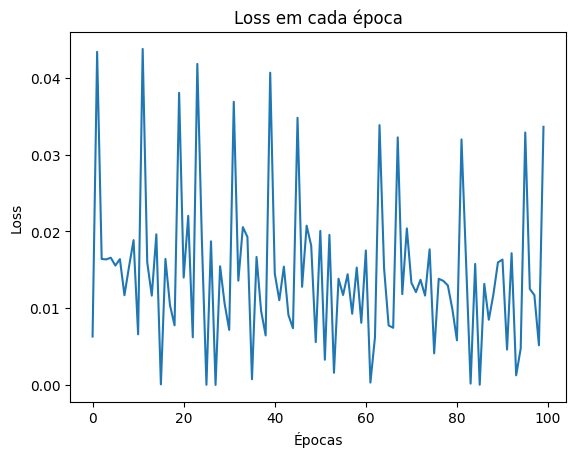

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.title('Loss em cada época')
plt.xlabel('Épocas')
plt.ylabel('Loss')